In [1]:
pip install tensorflow numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
!unzip "E-Waste classification dataset.zip" -d dataset


Archive:  E-Waste classification dataset.zip


  inflating: dataset/modified-dataset/test/Battery/battery_106.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_128.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_148.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_152.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_174.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_177.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_190.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_192.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_211.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_22.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_24.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_241.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_242.jpg  
  inflating: dataset/modified-dataset/test/Battery/battery_251.jpg  
  inflating: dataset/modified-datase

In [8]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

class_names = train_ds.class_names
print("Classes:", class_names)


2025-07-04 15:58:54.055994: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 15:58:54.317200: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 15:58:54.429734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751644734.598263    4927 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751644734.675327    4927 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751644735.263274    4927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Found 3000 files belonging to 1 classes.
Using 2400 files for training.
Found 3000 files belonging to 1 classes.
Using 600 files for validation.
Classes: ['modified-dataset']


2025-07-04 15:59:01.540809: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models

base = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base.trainable = False  # freeze base layers

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,920,593 (22.59 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [10]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
2025-07-04 16:07:41.758476: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-07-04 16:07:41.927652: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2025-07-04 16:07:41.961374: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2025-07-04 16:07:42.031615: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2025-07-04 16:07:42.045306: W external/local_xla/xla/tsl/framewo

75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10
7

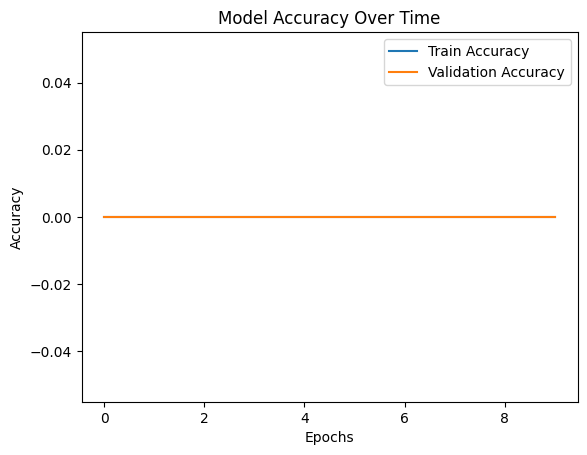

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Time")
plt.show()


In [17]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/modified-dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/modified-dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

print("✅ Classes loaded:", train_ds.class_names)


Found 2400 files belonging to 10 classes.
Using 1920 files for training.
Found 2400 files belonging to 10 classes.
Using 480 files for validation.
✅ Classes loaded: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


In [18]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models
import tensorflow as tf

IMG_SIZE = (224, 224)

# Load the pretrained base model
base_model = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze the base


In [19]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize input
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(train_ds.class_names), activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1089 - loss: 2.3550 - val_accuracy: 0.0812 - val_loss: 2.3136
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.1059 - loss: 2.3293 - val_accuracy: 0.0979 - val_loss: 2.3261
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1071 - loss: 2.3315 - val_accuracy: 0.1104 - val_loss: 2.3092
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.1186 - loss: 2.3371 - val_accuracy: 0.1000 - val_loss: 2.3137
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.0922 - loss: 2.3451 - val_accuracy: 0.0979 - val_loss: 2.3541
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1016 - loss: 2.3513 - val_accuracy: 0.1292 - val_loss: 2.3339
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1003 - loss: 2.3547 - val_accuracy: 0.0812 - val_loss: 2.3178
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.0981 - loss: 2.3296 - val_accuracy: 0.0854 - val_loss

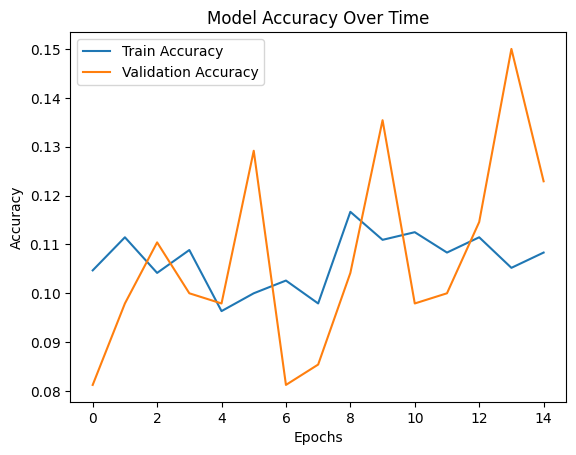

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Time")
plt.legend()
plt.show()


In [22]:
model.save("efficientnetv2b0_ewaste_classifier.h5")
